# Final Project 
## Lawrence Liu 
### 11.24.2025
---

#### Q1: Read in the data, call the dataframe "s"  and check the dimensions of the dataframe


In [3]:
import pandas as pd 
import numpy as np 


s = pd.read_csv('social_media_usage.csv')
s.shape
s.head()
s.columns
s.shape

(1502, 89)

---

#### Q2: Define a function called clean_sm that takes one input, x, and uses `np.where` to check whether x is equal to 1. If it is, make the value of x = 1, otherwise make it 0. Return x. Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected

In [8]:
def clean_sm(x):
    x = np.where(x == 1 , 1, 0)
    return x

data = [[1, 2], [3, 1], [4, 5]]
toy = pd.DataFrame(data, columns=['A', 'B'])
clean_sm(toy)

array([[1, 0],
       [0, 1],
       [0, 0]])

#### Q3: Create a new dataframe called "ss". The new dataframe should contain a target column called sm_li which should be a binary variable ( that takes the value of 1 if it is 1 and 0 otherwise (use clean_sm to create this) which indicates whether or not the individual uses LinkedIn, and the following features: income (ordered numeric from 1 to 9, above 9 considered missing), education (ordered numeric from 1 to 8, above 8 considered missing), parent (binary), married (binary), female (binary), and age (numeric, above 98 considered missing). Drop any missing values. Perform exploratory analysis to examine how the features are related to the target.

In [9]:
ss = pd.DataFrame(
    {
        'sm_li' : clean_sm(s['web1h']),
        'income' : np.where(s['income'] <= 9 , s['income'] , np.nan),
        'education': np.where(s['educ2'] <= 8 , s['educ2'], np.nan),
        'parent' : clean_sm(s['par']),
        'married' : clean_sm(s['marital']),
        'female' : np.where(s['gender'] == 2, 1, 0),
        'age' : np.where(s['age'] < 98 , s['age'] , np.nan)
    } 
)



In [6]:
ss.shape

(1502, 7)

In [ ]:
ss= ss.dropna()

In [13]:
ss.shape

(1260, 7)

---

#### perform EDA:


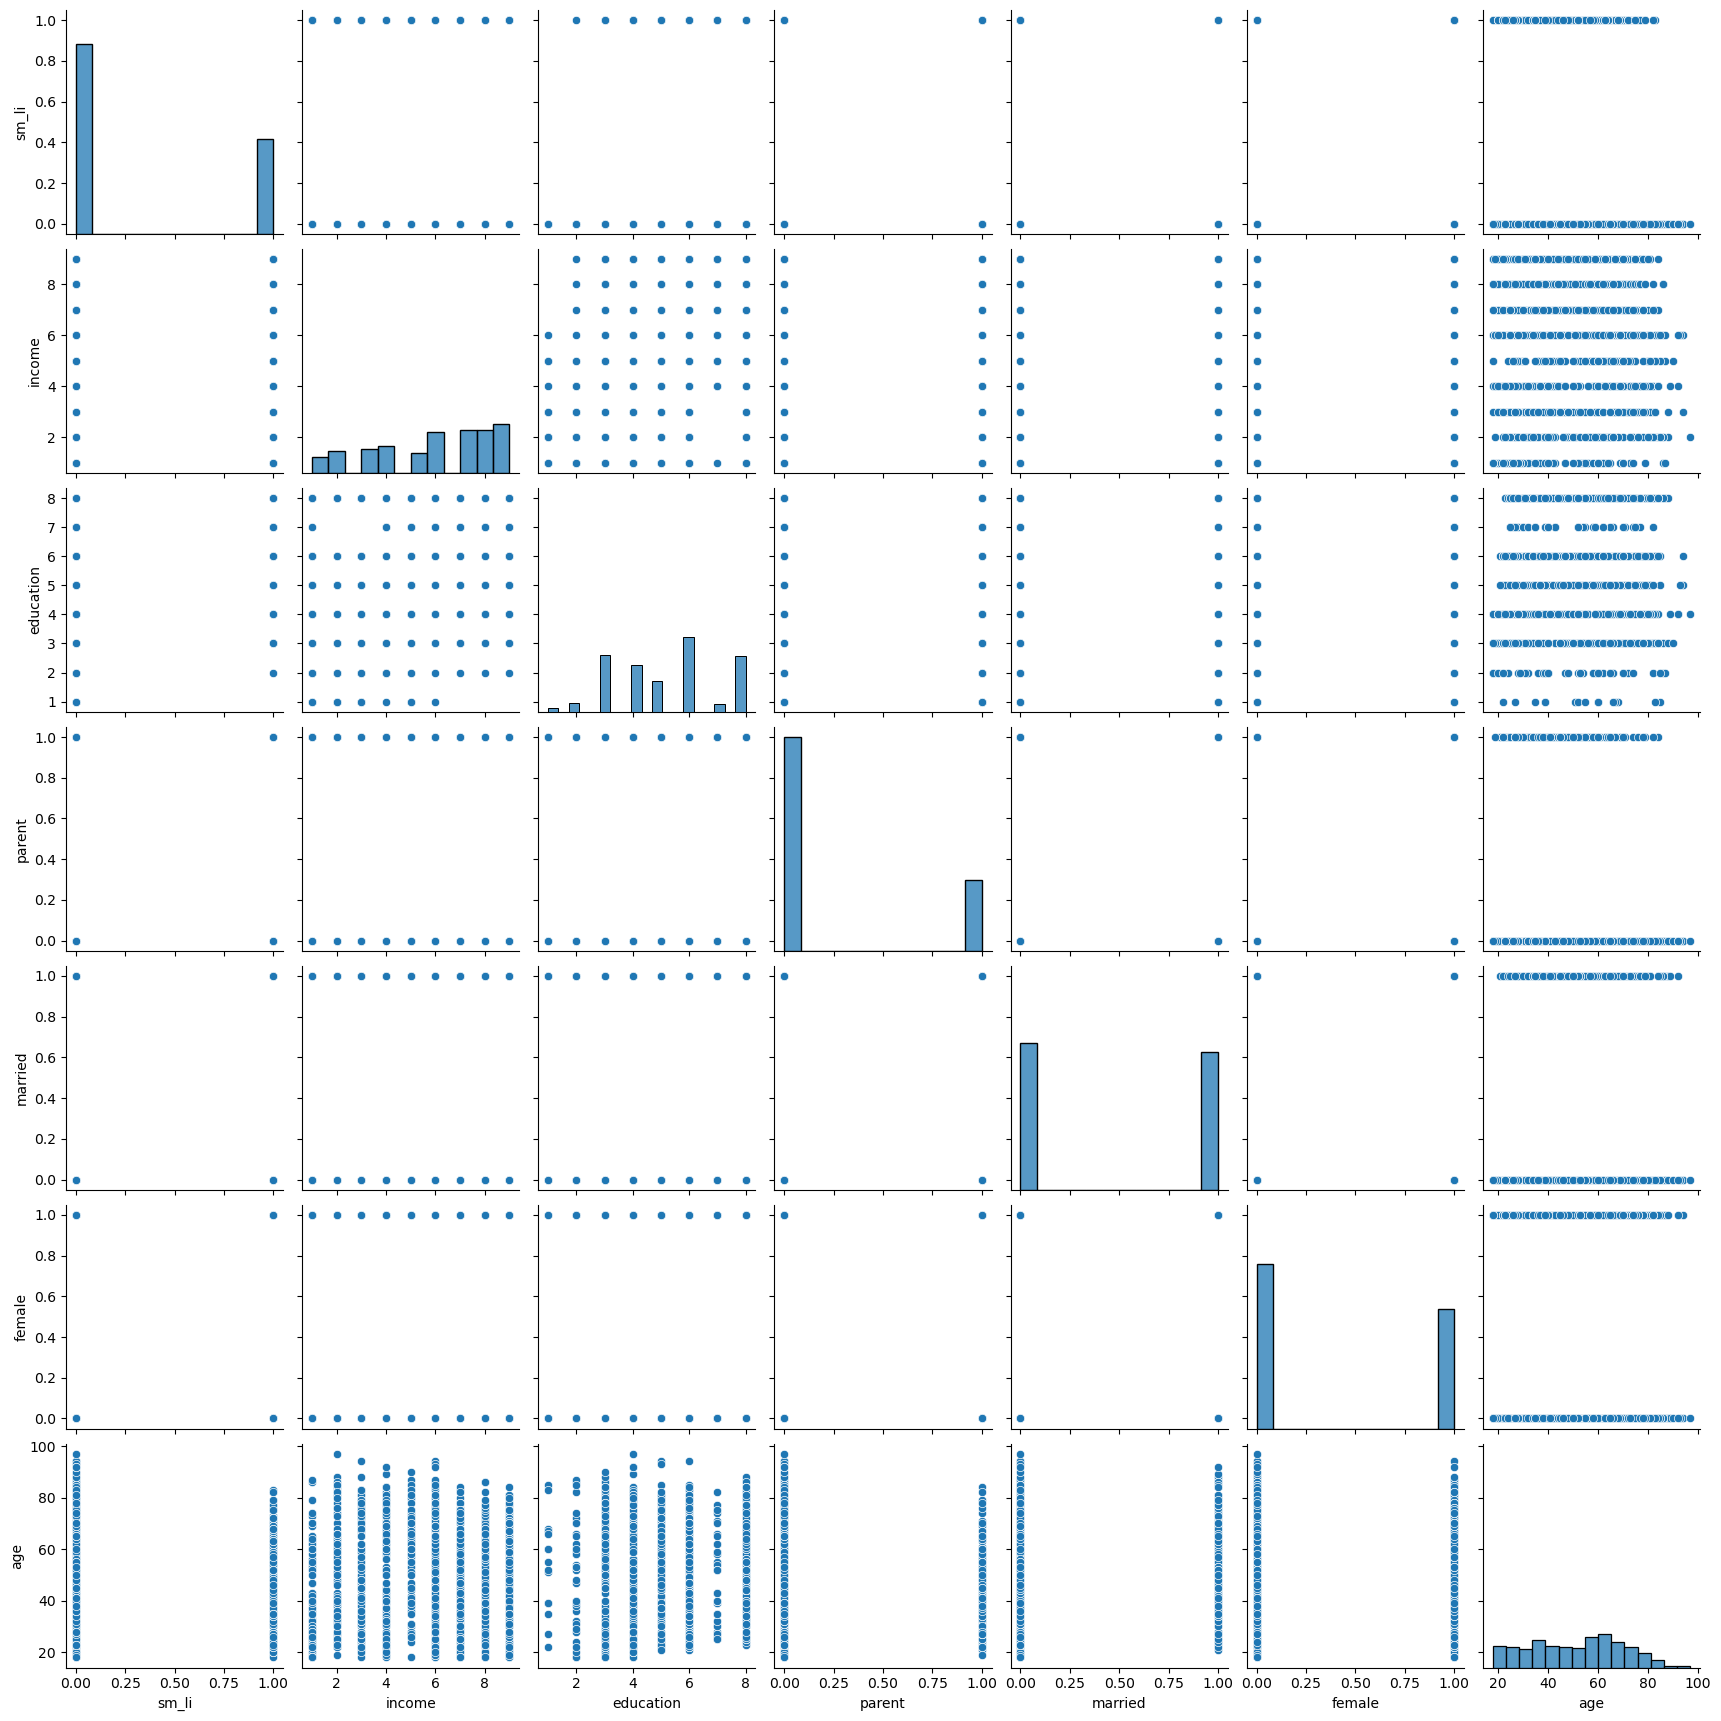

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.pairplot(data=ss)
plt.show()

---

EDA on the variables:

In [15]:
sm_li_counts = ss['sm_li'].value_counts()
sm_li_counts_perc = ss['sm_li'].value_counts(normalize= True)* 100



In [18]:
import altair as alt 

## create a value to see the LinkedIn user distribution
sm_chart = alt.Chart(ss).mark_bar().encode(
    x=alt.X('sm_li:N', title='LinkedIn User (0 = Not a User, 1 = LinkedIn User)'),
    y=alt.Y('count()', title='Value Counts'),
    tooltip=['sm_li:N', 'count()']
).properties(
    width=400,
    height=400,
    title='LinkedIn User Distribution'
)

sm_chart_income = alt.Chart(ss).mark_bar().encode(
    x=alt.X('income:O', title='Income Level (1 = Low , 9 = High)'), 
    y=alt.Y('count()', title='Value Count per Income Class'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['income:O', 'sm_li:N', 'count()']
).properties(
    width=400,
    height=400,
    title='LinkedIn Usage by Income Level'
)

sm_chart_edu = alt.Chart(ss).mark_bar().encode(
    x=alt.X('education:O', title='Education Level (1 = Low , 8 = High)'), 
    y=alt.Y('count()', title='Value Count per Education Level'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['education:O', 'sm_li:N', 'count()']
).properties(
    width=400,
    height=400,
    title='LinkedIn Usage by Education Level'
)

sm_chart_parent = alt.Chart(ss).mark_bar().encode(
    x=alt.X('parent:O', title='Parent (0 = No , 1 = Yes)'), 
    y=alt.Y('count()', title='Value Count by Parent Status'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['parent:O', 'sm_li:N', 'count()']
).properties(
    width=400,
    height=400,
    title='LinkedIn Usage by Parent Status'
)

sm_chart_married = alt.Chart(ss).mark_bar().encode(
    x=alt.X('married:O', title='Marital Status (0 = No , 1 = Yes)'), 
    y=alt.Y('count()', title='Value Count by Marital Status'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['married:O', 'sm_li:N', 'count()']
).properties(
    width=300,
    height=400,
    title='LinkedIn Usage by Marital Status'
)

sm_chart_gender = alt.Chart(ss).mark_bar().encode(
    x=alt.X('female:O', title='Gender (0 = Male , 1 = Female)'), 
    y=alt.Y('count()', title='Value Count by Gender'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['female:O', 'sm_li:N', 'count()']
).properties(
    width=300,
    height=400,
    title='LinkedIn Usage by Gender'
)

sm_chart_age = alt.Chart(ss).mark_area().encode(
    x=alt.X('age:Q', title='Age'),
    y=alt.Y('count()', stack=None, title='Count'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    xOffset='sm_li:N',
    tooltip=['age:Q', 'sm_li:N', 'count()']
).properties(
    width=600,
    height=400,
    title='LinkedIn Usage by Age'
)

# Combine all charts into one dashboard
row1 = alt.hconcat(sm_chart_income, sm_chart_edu, sm_chart_parent)
row2 = alt.hconcat(sm_chart_married, sm_chart_gender, sm_chart_age)

# Final Dashboard
dashboard = alt.vconcat(
    row1,
    row2
).properties(
    title=alt.TitleParams(
        text='LinkedIn Usage - Exploratory Data Analysis Dashboard',
        fontSize=20,
        fontWeight='bold',
        anchor='middle'
    )
).configure_axis(
    labelFontSize=11,
    titleFontSize=12
).configure_title(
    fontSize=14,
    fontWeight='bold'
)

dashboard

alt.VConcatChart(...)

In [20]:
import altair as alt

# Create correlation matrix
corr_matrix = ss.corr()

# Convert to long format for Altair
corr_data = corr_matrix.stack().reset_index()
corr_data.columns = ['Feature1', 'Feature2', 'Correlation']

# Create heatmap
fig_corr = alt.Chart(corr_data).mark_rect().encode(
    x=alt.X('Feature1:N', title='Features'),
    y=alt.Y('Feature2:N', title='Features'),
    color=alt.Color('Correlation:Q'),
    tooltip=['Feature1', 'Feature2', alt.Tooltip('Correlation:Q', format='.2f')]
).properties(
    width=900,
    height=900,
    title='Feature Correlation Matrix'
)
fig_corr


alt.Chart(...)

# Key insights: 
- Age seems to be negatively correlated with LinkedIn Usage 
- Education and Income have positive correlation with LinkedIn Usage
- Correlation plot shows there is not significant multicolinearity -> great for modeling

#### Q4: Create a target vector (y) and feature set (X)

In [22]:
# the target variable is y 

target_variables = ss['sm_li']

# define the features 

features = ss.drop('sm_li' , axis =1)


In [23]:
features.describe()

,income,education,parent,married,female,age
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,5.865873,5.203175,0.249206,0.483333,0.419841,51.253968
std,2.474385,1.877501,0.432725,0.499921,0.493729,18.403705
min,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000
25%,4.000000,4.000000,0.000000,0.000000,0.000000,36.000000
50%,6.000000,5.000000,0.000000,0.000000,0.000000,52.000000
75%,8.000000,6.000000,0.000000,1.000000,1.000000,65.000000
max,9.000000,8.000000,1.000000,1.000000,1.000000,97.000000


#### Q5: Split the data into training and test sets. Hold out 20% of the data for testing. Explain what each new object contains and how it is used in machine learning

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    features, 
    target_variables, 
    test_size= 0.20, 
    random_state=42, 
    stratify = target_variables
)

In [25]:
X_train.describe()

,income,education,parent,married,female,age
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,5.839286,5.188492,0.256944,0.474206,0.426587,51.113095
std,2.470474,1.867558,0.437165,0.499582,0.494827,18.456990
min,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000
25%,4.000000,4.000000,0.000000,0.000000,0.000000,36.000000
50%,6.000000,5.000000,0.000000,0.000000,0.000000,52.000000
75%,8.000000,6.000000,1.000000,1.000000,1.000000,65.000000
max,9.000000,8.000000,1.000000,1.000000,1.000000,97.000000


- X_train produces a training dataset containing 80% of the data (necessary to compare the fitted model on the test dataset). this dataset is of the predictors 
- y_train produces a training dataset containing 80% of the data (necessary to compare the fitted model ). This dataset contains only the target variable

- X_test prododuces a testing dataset containing 20% of the data (necessary to check the trained model on the testing set). This datast contains the predictors
- y_test prodices a testing dataset containing 20% of the data (necessary to check the trained model on the testing set). This dataset contains only the target variable

---

#### Q6: Instantiate a logistic regression model and set class_weight to balanced. Fit the model with the training data.


Create a simple model:

In [30]:
from sklearn.linear_model import LogisticRegression
simple_model = LogisticRegression( 
    class_weight='balanced',
    random_state=42, 
    max_iter=1000
)
simple_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
simple_model.coef_[0]

array([ 0.28409137,  0.35647752,  0.21298011, -0.13659719, -0.20456996,
       -0.02761299])

Create a more advanced model for the deployed streamlit app using KNN imputation

In [36]:
ss1 = pd.DataFrame(
    {
        'sm_li' : clean_sm(s['web1h']),
        'income' : np.where(s['income'] <= 9 , s['income'] , np.nan),
        'education': np.where(s['educ2'] <= 8 , s['educ2'], np.nan),
        'parent' : clean_sm(s['par']),
        'married' : clean_sm(s['marital']),
        'female' : np.where(s['gender'] == 2, 1, 0),
        'age' : np.where(s['age'] < 98 , s['age'] , np.nan)
    } 
)

### only drop 

ss1 = ss1.dropna(subset=['sm_li'])
ss1.shape

(1502, 7)

In [37]:
X_advanced = ss1.drop('sm_li' , axis =1)
y_advanced = ss1['sm_li']

X_train_adv , X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_advanced,
    y_advanced, 
    test_size=0.20,
    random_state=42,
    stratify=y_advanced
)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

## first we need to set up cross validation 

cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state=42)

## set up the pipeline 

knn_pipeline = Pipeline(steps = [ 
    ("imputer" , KNNImputer(n_neighbors=5)),
    ("scaler" , StandardScaler()),
    ("model", LogisticRegression(class_weight='balanced' , max_iter=2500 , random_state=42))
])

scores_knn = cross_val_score(
    knn_pipeline,
    X_train_adv,
    y_train_adv,
    cv=cv,
    scoring='accuracy'
)

print("KNN imputation + pipeline CV accuracy:", scores_knn.mean())

KNN imputation + pipeline CV accuracy: 0.6744432918395574


#### Q7:Evaluate the model using the testing data. What is the model accuracy for the model? Use the model to make predictions and then generate a confusion matrix from the model. Interpret the confusion matrix and explain what each number means.

In [49]:
## evaluate the simple model 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
y_pred_simple_train = simple_model.predict(X_train)
y_pred_simple_test = simple_model.predict(X_test)

## set up the accuracy for test and train sets 
accuracy_simple_train = accuracy_score(y_train, y_pred_simple_train)
accuracy_simple_test = accuracy_score(y_test, y_pred_simple_test)
print(f"\nAccuracy Score - Training Set: {accuracy_simple_train}")
print(f"\nAccuracy Score - Testing Set: {accuracy_simple_test}")
# Create confusion matrices
cm_simple_train = confusion_matrix(y_train, y_pred_simple_train)
cm_simple_test = confusion_matrix(y_test, y_pred_simple_test)
print(f"\nConfusion Matrix - Training Set:")
print(pd.DataFrame(
    cm_simple_train,
    index=["Actual: Not User", "Actual: User"],
    columns=["Pred: Not User", "Pred: User"]
))

print(f"\nConfusion Matrix - Test Set:")
print(pd.DataFrame(
    cm_simple_test,
    index=["Actual: Not User", "Actual: User"],
    columns=["Pred: Not User", "Pred: User"]
))



Accuracy Score - Training Set: 0.691468253968254

Accuracy Score - Testing Set: 0.6468253968253969

Confusion Matrix - Training Set:
                  Pred: Not User  Pred: User
Actual: Not User             446         226
Actual: User                  85         251

Confusion Matrix - Test Set:
                  Pred: Not User  Pred: User
Actual: Not User             104          64
Actual: User                  25          59


In [50]:
## Genderate some additional statistics: 
precision_simple_train = precision_score(y_train, y_pred_simple_train)
recall_simple_train = recall_score(y_train, y_pred_simple_train)
f1_simple_train = f1_score(y_train, y_pred_simple_train)
precision_simple_test = precision_score(y_test, y_pred_simple_test)
recall_simple_test = recall_score(y_test, y_pred_simple_test)
f1_simple_test = f1_score(y_test, y_pred_simple_test)
print(f"\nPrecision Score - Training Set: {precision_simple_train}")
print(f"\nPrecision Score - Testing Set: {precision_simple_test}")
print(f"\nRecall Score - Training Set: {recall_simple_train}")
print(f"\nRecall Score - Testing Set: {recall_simple_test}")
print(f"\nf1 Score - Training Set: {f1_simple_train}")
print(f"\nf1 Score - Testing Set: {f1_simple_train}")


Precision Score - Training Set: 0.5262054507337526

Precision Score - Testing Set: 0.4796747967479675

Recall Score - Training Set: 0.7470238095238095

Recall Score - Testing Set: 0.7023809523809523

f1 Score - Training Set: 0.6174661746617466

f1 Score - Testing Set: 0.6174661746617466


#### now for the KNN model


Accuracy Score - Training Set: 0.6835970024979184

Accuracy Score - Testing Set: 0.6877076411960132

Confusion Matrix - Training Set:
                  Pred: Not User  Pred: User
Actual: Not User             546         271
Actual: User                 109         275

Confusion Matrix - Test Set:
                  Pred: Not User  Pred: User
Actual: Not User             136          69
Actual: User                  25          71


<Axes: >

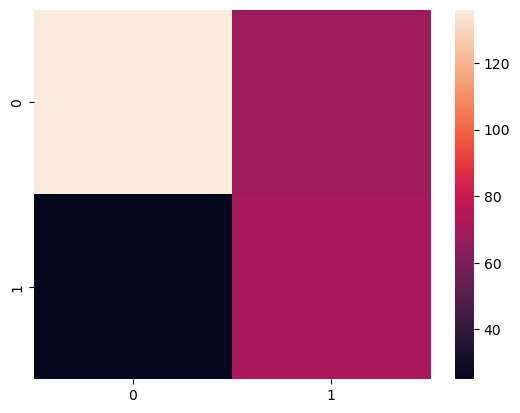

In [ ]:
## Make predictions on both the train and the test set 
y_pred_advanced_train = knn_pipeline.predict(X_train_adv)
y_pred_advanced_test = knn_pipeline.predict(X_test_adv)
## get the probabilities 
y_pred_probability_train = knn_pipeline.predict_proba(X_train_adv)
y_pred_probability_test = knn_pipeline.predict_proba(X_test_adv)

## same from above check accuracy and coreate confusion matrix (copy paste and change variable names from above)
accuracy_advanced_train = accuracy_score(y_train_adv, y_pred_advanced_train)
accuracy_advanced_test = accuracy_score(y_test_adv, y_pred_advanced_test)
print(f"\nAccuracy Score - Training Set: {accuracy_advanced_train}")
print(f"\nAccuracy Score - Testing Set: {accuracy_advanced_test}")
cm_advanced_train = confusion_matrix(y_train_adv, y_pred_advanced_train)
cm_advanced_test = confusion_matrix(y_test_adv, y_pred_advanced_test)
print(f"\nConfusion Matrix - Training Set:")
print(pd.DataFrame(
    cm_advanced_train,
    index=["Actual: Not User", "Actual: User"],
    columns=["Pred: Not User", "Pred: User"]
))

print(f"\nConfusion Matrix - Test Set:")
print(pd.DataFrame(
    cm_advanced_test,
    index=["Actual: Not User", "Actual: User"],
    columns=["Pred: Not User", "Pred: User"]
))

In [53]:
precision_advanced_train = precision_score(y_train_adv, y_pred_advanced_train)
recall_advanced_train = recall_score(y_train_adv, y_pred_advanced_train)
f1_advanced_train = f1_score(y_train_adv, y_pred_advanced_train)
precision_advanced_test = precision_score(y_test_adv, y_pred_advanced_test)
recall_advanced_test = recall_score(y_test_adv, y_pred_advanced_test)
f1_advanced_test = f1_score(y_test_adv, y_pred_advanced_test)
print(f"\nPrecision Score - Training Set: {precision_advanced_train}")
print(f"\nPrecision Score - Testing Set: {precision_advanced_test}")
print(f"\nRecall Score - Training Set: {recall_advanced_train}")
print(f"\nRecall Score - Testing Set: {recall_advanced_test}")
print(f"\nf1 Score - Training Set: {f1_advanced_train}")
print(f"\nf1 Score - Testing Set: {f1_advanced_train}")



Precision Score - Training Set: 0.5036630036630036

Precision Score - Testing Set: 0.5071428571428571

Recall Score - Training Set: 0.7161458333333334

Recall Score - Testing Set: 0.7395833333333334

f1 Score - Training Set: 0.5913978494623656

f1 Score - Testing Set: 0.5913978494623656


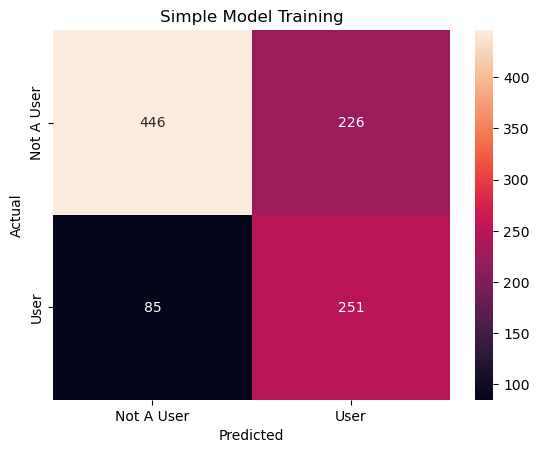

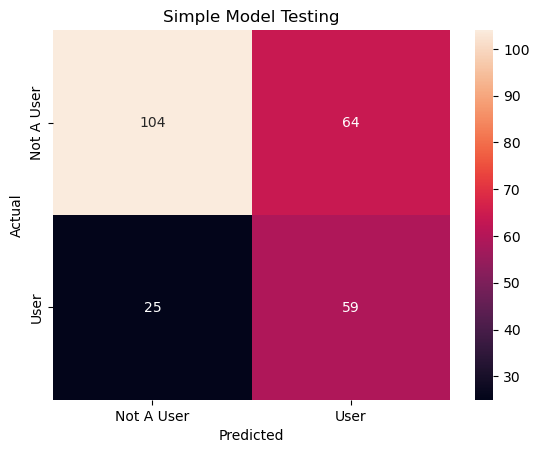

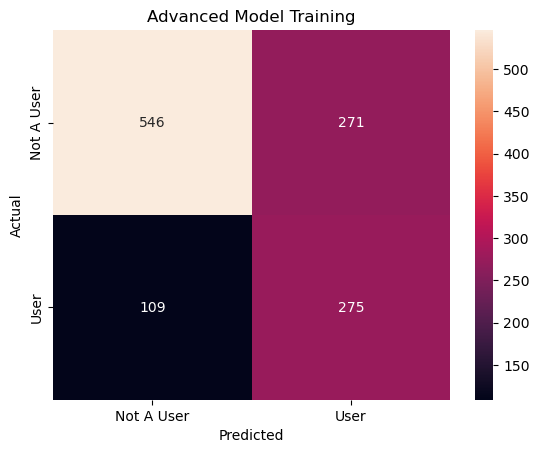

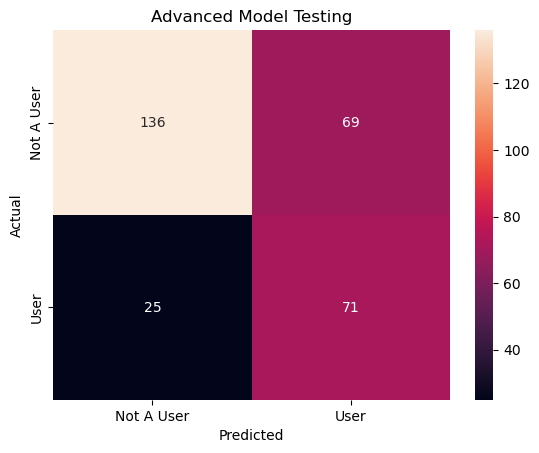

In [71]:
sns.heatmap( cm_simple_train , annot= True ,fmt= 'd')
plt.title( "Simple Model Training")
plt.xlabel("Predicted")
plt.ylabel( "Actual")
plt.xticks([0.5 , 1.5], ["Not A User","User"])
plt.yticks([0.5 ,1.5], ["Not A User" , "User"])
plt.show()
sns.heatmap( cm_simple_test , annot= True ,fmt= 'd')
plt.title( "Simple Model Testing")
plt.xlabel("Predicted")
plt.ylabel( "Actual")
plt.xticks([0.5 , 1.5], ["Not A User","User"])
plt.yticks([0.5 ,1.5], ["Not A User" , "User"])
plt.show()
sns.heatmap( cm_advanced_train , annot= True ,fmt= 'd')
plt.title( "Advanced Model Training")
plt.xlabel("Predicted")
plt.ylabel( "Actual")
plt.xticks([0.5 , 1.5], ["Not A User","User"])
plt.yticks([0.5 ,1.5], ["Not A User" , "User"])
plt.show()
sns.heatmap( cm_advanced_test , annot= True ,fmt= 'd')
plt.title( "Advanced Model Testing")
plt.xlabel("Predicted")
plt.ylabel( "Actual")
plt.xticks([0.5 , 1.5], ["Not A User","User"])
plt.yticks([0.5 ,1.5], ["Not A User" , "User"])
plt.show()




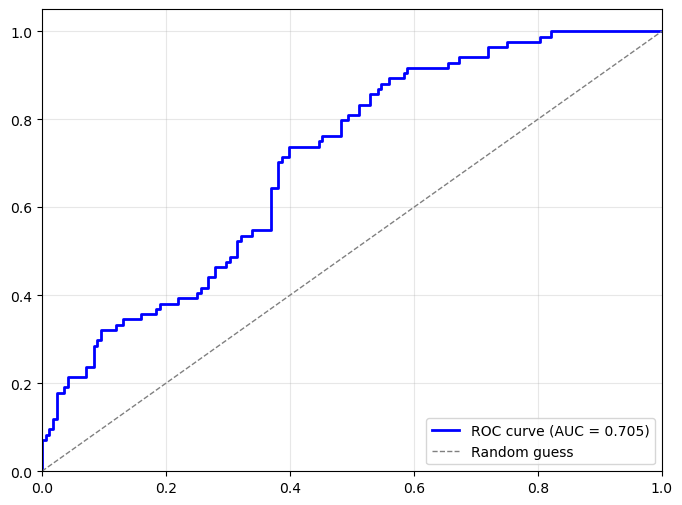

AUC Score: 0.7049


In [82]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Fit the pipeline
simple_model.fit(X_train, y_train)

# Get predicted probabilities (need probabilities for ROC, not just predictions)
y_pred_proba = simple_model.predict_proba(X_test)[:, 1]  # probability of class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Score: {auc_score:.4f}")

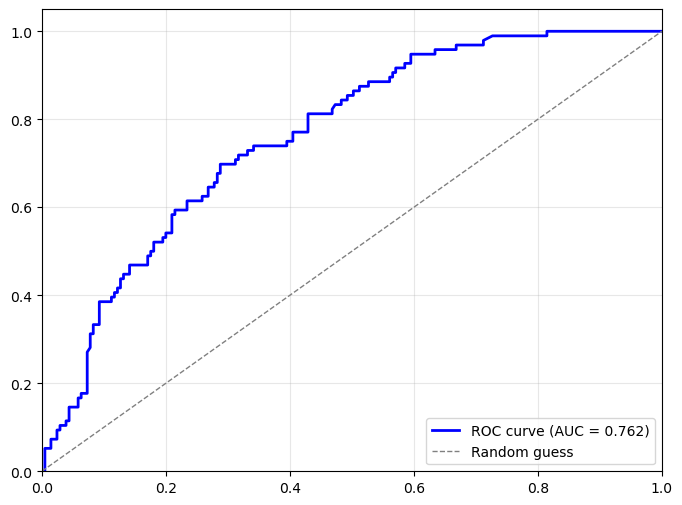

AUC Score: 0.7624


In [81]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Fit the pipeline
knn_pipeline.fit(X_train_adv, y_train_adv)

# Get predicted probabilities (need probabilities for ROC, not just predictions)
y_pred_proba_adv = knn_pipeline.predict_proba(X_test_adv)[:, 1]  # probability of class 1

# Calculate ROC curve
fpr_adv, tpr_adv, thresholds = roc_curve(y_test_adv, y_pred_proba_adv)

# Calculate AUC score
auc_score_adv = roc_auc_score(y_test_adv, y_pred_proba_adv)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_adv, tpr_adv, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Score: {auc_score_adv:.4f}")

- As expected the KNN imputation model was better! 

---

#### Q8:Create the confusion matrix as a dataframe and add informative column names and index names that indicate what each quadrant represents

- TN : True Negative (Non LinkedIn Users corrected predicted as non-users)
- FP : False Positive (Non LinkedIn Users incorrecpted predicted as users (type 1 error))
- FN: False Negative (LinkedIn Users who are incorecttely predicted as non LinkedIn Users (type 2))
- TP: True Positive ( LinkedIn Users who are correctly predicted as LinkedIn Users)

In [64]:
cm_simple_train = confusion_matrix(y_train, y_pred_simple_train)
cm_simple_test = confusion_matrix(y_test, y_pred_simple_test)
print(f"\nConfusion Matrix - Training Set:")
print(pd.DataFrame(
    cm_simple_train,
    index=["Actual: Not User", "Actual: User"],
    columns=["Pred: Not User", "Pred: User"]
))

print(f"\nConfusion Matrix - Test Set:")
print(pd.DataFrame(
    cm_simple_test,
    index=["Actual: Not User", "Actual: User"],
    columns=["Pred: Not User", "Pred: User"]
))
cm_advanced_train = confusion_matrix(y_train_adv, y_pred_advanced_train)
cm_advanced_test = confusion_matrix(y_test_adv, y_pred_advanced_test)
print(f"\nConfusion Matrix - Training Set:")
print(pd.DataFrame(
    cm_advanced_train,
    index=["Actual: Not User", "Actual: User"],
    columns=["Pred: Not User", "Pred: User"]
))

print(f"\nConfusion Matrix - Test Set:")
print(pd.DataFrame(
    cm_advanced_test,
    index=["Actual: Not User", "Actual: User"],
    columns=["Pred: Not User", "Pred: User"]
))

### building from the confusion matrix above 
# Q1 is TN
# Q2 is FP
# Q3 is FN
# Q4 is TP

## create a label set to use as annotations 
labels = [['TN' , 'FP'] , ['FN' , 'TP']]


Confusion Matrix - Training Set:
                  Pred: Not User  Pred: User
Actual: Not User             446         226
Actual: User                  85         251

Confusion Matrix - Test Set:
                  Pred: Not User  Pred: User
Actual: Not User             104          64
Actual: User                  25          59

Confusion Matrix - Training Set:
                  Pred: Not User  Pred: User
Actual: Not User             546         271
Actual: User                 109         275

Confusion Matrix - Test Set:
                  Pred: Not User  Pred: User
Actual: Not User             136          69
Actual: User                  25          71


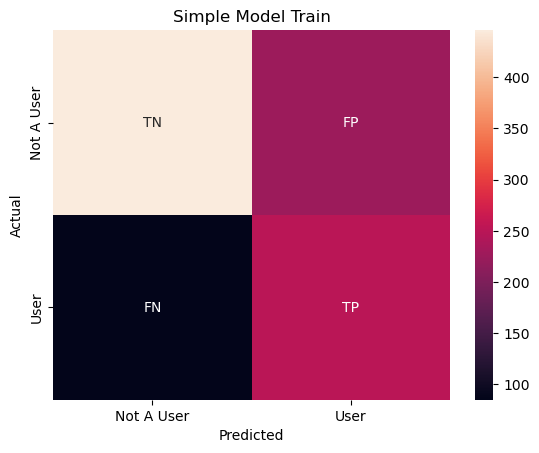

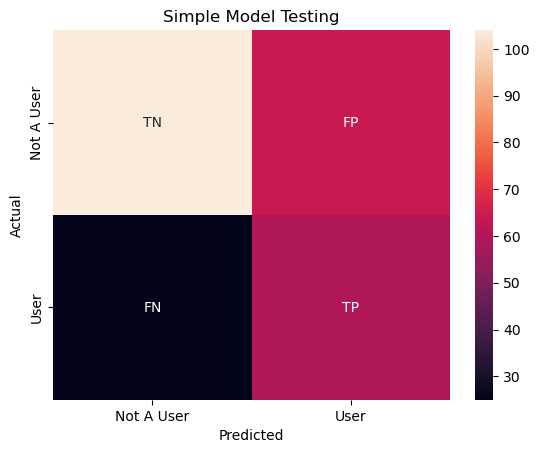

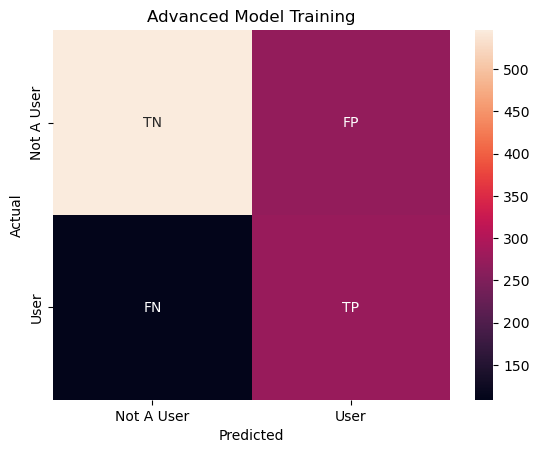

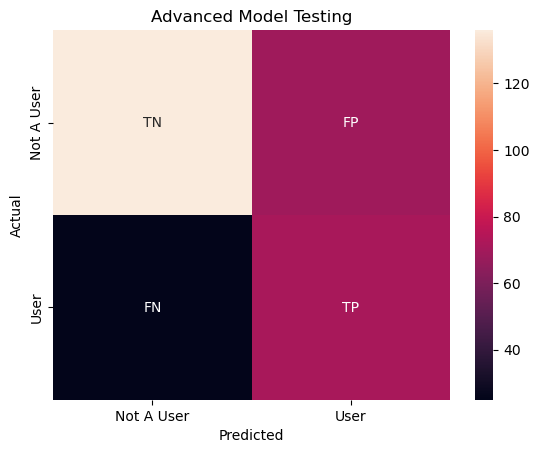

In [72]:
sns.heatmap( cm_simple_train , annot= labels , fmt='')
plt.title( "Simple Model Train")
plt.xlabel("Predicted")
plt.ylabel( "Actual")
plt.xticks([0.5 , 1.5], ["Not A User","User"])
plt.yticks([0.5 ,1.5], ["Not A User" , "User"])
plt.show()
sns.heatmap( cm_simple_test , annot= labels,  fmt='')
plt.title( "Simple Model Testing")
plt.xlabel("Predicted")
plt.ylabel( "Actual")
plt.xticks([0.5 , 1.5], ["Not A User","User"])
plt.yticks([0.5 ,1.5], ["Not A User" , "User"])
plt.show()
sns.heatmap( cm_advanced_train , annot= labels,  fmt='')
plt.title( "Advanced Model Training")
plt.xlabel("Predicted")
plt.ylabel( "Actual")
plt.xticks([0.5 , 1.5], ["Not A User","User"])
plt.yticks([0.5 ,1.5], ["Not A User" , "User"])
plt.show()
sns.heatmap( cm_advanced_test , annot= labels, fmt='')
plt.title( "Advanced Model Testing")
plt.xlabel("Predicted")
plt.ylabel( "Actual")
plt.xticks([0.5 , 1.5], ["Not A User","User"])
plt.yticks([0.5 ,1.5], ["Not A User" , "User"])
plt.show()


#### Q9: Aside from accuracy, there are three other metrics used to evaluate model performance: precision, recall, and F1 score. Use the results in the confusion matrix to calculate each of these metrics by hand. Discuss each metric and give an actual example of when it might be the preferred metric of evaluation. After calculating the metrics by hand, create a classification_report using sklearn and check to ensure your metrics match those of the classification_report.

In [75]:
## pull variables 
TN_simple_train = cm_simple_train[0][0]
FP_simple_train = cm_simple_train[0][1]
FN_simple_train = cm_simple_train[1][0]
TP_simple_train = cm_simple_train[1][1]
TN_simple_test = cm_simple_test[0][0]
FP_simple_test = cm_simple_test[0][1]
FN_simple_test = cm_simple_test[1][0]
TP_simple_test = cm_simple_test[1][1]
TN_advanced_train = cm_advanced_train[0][0]
FP_advanced_train = cm_advanced_train[0][1]
FN_advanced_train = cm_advanced_train[1][0]
TP_advanced_train = cm_advanced_train[1][1]
TN_advanced_test = cm_advanced_test[0][0]
FP_advanced_test = cm_advanced_test[0][1]
FN_advanced_test = cm_advanced_test[1][0]
TP_advanced_test = cm_advanced_test[1][1]
# calcualte by hand 
accuracy_manual_simple_train = (TP_simple_train + TN_simple_train) / (TP_simple_train + TN_simple_train + FP_simple_train + FN_simple_train)
accuracy_manual_simple_test = (TP_simple_test + TN_simple_test) / (TP_simple_test + TN_simple_test + FP_simple_test + FN_simple_test)
accuracy_manual_advanced_train = (TP_advanced_train + TN_advanced_train) / (TP_advanced_train + TN_advanced_train + FP_advanced_train + FN_advanced_train)
accuracy_manual_advanced_test = (TP_advanced_test + TN_advanced_test) / (TP_advanced_test + TN_advanced_test + FP_advanced_test + FN_advanced_test)

precision_manual_simple_train = TP_simple_train / (TP_simple_train + FP_simple_train)
precision_manual_simple_test = TP_simple_test / (TP_simple_test + FP_simple_test)
precision_manual_advanced_train = TP_advanced_train / (TP_advanced_train + FP_advanced_train)
precision_manual_advanced_test = TP_advanced_test / (TP_advanced_test + FP_advanced_test)

recall_manual_simple_train = TP_simple_train / (TP_simple_train +FN_simple_train)
recall_manual_simple_test = TP_simple_test / (TP_simple_test +FN_simple_test)
recall_manual_advanced_train = TP_advanced_train / (TP_advanced_train +FN_advanced_train)
recall_manual_advanced_test = TP_advanced_test / (TP_advanced_test +FN_advanced_test)

f1_manual_simple_train = 2*(precision_manual_simple_train * recall_manual_simple_train) / (precision_manual_simple_train + recall_manual_simple_train)
f1_manual_simple_test = 2*(precision_manual_simple_test * recall_manual_simple_test) / (precision_manual_simple_test + recall_manual_simple_test)
f1_manual_advanced_train = 2*(precision_manual_advanced_train * recall_manual_advanced_train) / (precision_manual_advanced_train + recall_manual_advanced_train)
f1_manual_advanced_test = 2*(precision_manual_advanced_test * recall_manual_advanced_test) / (precision_manual_advanced_test + recall_manual_advanced_test)


- create a dataframe with the all the scores to compare

In [78]:
results = pd.DataFrame({
    'Model' : ['Simple' , 'Simple' , 'Advanced' , 'Advanced'],
    'Dataset' : ['Training' , 'Testing' , 'Training' , 'Testing'],
    'Accuracy' : [accuracy_simple_train , accuracy_simple_test , accuracy_advanced_train , accuracy_advanced_test],
    'Precision' : [precision_simple_train , precision_simple_test , precision_advanced_train , precision_advanced_test],
    'Recall' : [recall_simple_train , recall_simple_test , recall_advanced_train, recall_advanced_test],
    'F1' : [f1_simple_train , f1_simple_test , f1_advanced_train, f1_advanced_test]
})
results_manual = pd.DataFrame({
    'Model' : ['Simple' , 'Simple' , 'Advanced' , 'Advanced'],
    'Dataset' : ['Training' , 'Testing' , 'Training' , 'Testing'],
    'Accuracy' : [accuracy_manual_simple_train , accuracy_manual_simple_test , accuracy_manual_advanced_train , accuracy_manual_advanced_test],
    'Precision' : [precision_manual_simple_train , precision_manual_simple_test , precision_manual_advanced_train , precision_manual_advanced_test],
    'Recall' : [recall_manual_simple_train , recall_manual_simple_test , recall_manual_advanced_train, recall_manual_advanced_test],
    'F1' : [f1_manual_simple_train , f1_manual_simple_test , f1_manual_advanced_train, f1_manual_advanced_test]

})


results.equals(results_manual)

True

both dataframes are identical

In [79]:
print('Results from classification report')
print(results)
print('Results from manual calculation')
print(results_manual)

Results from classification report
      Model   Dataset  Accuracy  Precision    Recall        F1
0    Simple  Training  0.691468   0.526205  0.747024  0.617466
1    Simple   Testing  0.646825   0.479675  0.702381  0.570048
2  Advanced  Training  0.683597   0.503663  0.716146  0.591398
3  Advanced   Testing  0.687708   0.507143  0.739583  0.601695
Results from manual calculation
      Model   Dataset  Accuracy  Precision    Recall        F1
0    Simple  Training  0.691468   0.526205  0.747024  0.617466
1    Simple   Testing  0.646825   0.479675  0.702381  0.570048
2  Advanced  Training  0.683597   0.503663  0.716146  0.591398
3  Advanced   Testing  0.687708   0.507143  0.739583  0.601695


- Precision refers to 


#### Q10: Use the model to make predictions. For instance, what is the probability that a high income (e.g. income=8), with a high level of education (e.g. 7), non-parent who is married female and 42 years old uses LinkedIn? How does the probability change if another person is 82 years old, but otherwise the same?

In [84]:
## making prediction predictors 

## person 1 
person1 = pd.DataFrame({
    'income': [8],        # High income ($100k-$150k)
    'education': [7],     # Some postgraduate schooling
    'parent': [0],        # Not a parent
    'married': [1],       # Married
    'female': [1],        # Female
    'age': [42]           # 42 years old
})

# Person 2: Same as Person 1 but 82 years old
person2 = pd.DataFrame({
    'income': [8],
    'education': [7],
    'parent': [0],
    'married': [1],
    'female': [1],
    'age': [82]           # 82 years old
})

# Get predictions and probabilities for person 1
pred1 = knn_pipeline.predict(person1)[0]
prob1 = knn_pipeline.predict_proba(person1)[0]
# Get predictions and probabilities for person 2 
pred2 = knn_pipeline.predict(person2)[0]
prob2 = knn_pipeline.predict_proba(person2)[0]

print(f"Prediction: {'LinkedIn User' if pred1 == 1 else 'Not a LinkedIn User'}")
print(f"Probability of NOT being a LinkedIn user: {prob1[0]*100:.2f}%")
print(f"Probability of being a LinkedIn user: {prob1[1]*100:.2f}%")
print(f"Prediction: {'LinkedIn User' if pred2 == 1 else 'Not a LinkedIn User'}")
print(f"Probability of NOT being a LinkedIn user: {prob2[0]*100:.2f}%")
print(f"Probability of being a LinkedIn user: {prob2[1]*100:.2f}%")

Prediction: LinkedIn User
Probability of NOT being a LinkedIn user: 27.56%
Probability of being a LinkedIn user: 72.44%
Prediction: Not a LinkedIn User
Probability of NOT being a LinkedIn user: 52.36%
Probability of being a LinkedIn user: 47.64%


In [85]:
pred1a = simple_model.predict(person1)[0]
prob1a = simple_model.predict_proba(person1)[0]
# Get predictions and probabilities for person 2 
pred2a = simple_model.predict(person2)[0]
prob2a = simple_model.predict_proba(person2)[0]

print(f"Prediction: {'LinkedIn User' if pred1a == 1 else 'Not a LinkedIn User'}")
print(f"Probability of NOT being a LinkedIn user: {prob1a[0]*100:.2f}%")
print(f"Probability of being a LinkedIn user: {prob1a[1]*100:.2f}%")
print(f"Prediction: {'LinkedIn User' if pred2a == 1 else 'Not a LinkedIn User'}")
print(f"Probability of NOT being a LinkedIn user: {prob2a[0]*100:.2f}%")
print(f"Probability of being a LinkedIn user: {prob2a[1]*100:.2f}%")

Prediction: LinkedIn User
Probability of NOT being a LinkedIn user: 26.34%
Probability of being a LinkedIn user: 73.66%
Prediction: Not a LinkedIn User
Probability of NOT being a LinkedIn user: 51.90%
Probability of being a LinkedIn user: 48.10%


- It was found that High Income and having some post graduate schooling greatly contributed to being a LinkedIn User 
- It was found that age has a negative correlation to being a LinkedIn User
- Both of these predictions make sense, as when you get older (past 65) and are retired you are significantly less likely to use LinkedIn, as you are no actively looking for a job. Additionally, it makes sense that the higher income you have and the more schooling you have the more likely you are to seek connenctions and job opportunities, respectively. 

---